In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
data = data.drop(['keyword', 'id', 'location'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
import numpy as asarray
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english') )
lemmatizer = WordNetLemmatizer()

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [5]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [14]:
def cleaned_tweet(tweet):
    tweet = re.sub(r'@[a-zA-Z0-9]+', '', tweet)           #remove user mentions 
    tweet = re.sub(r'http\S+', '', tweet)                 #remove url and links
    tweet = re.sub(r'[#$%@^&*()?]', '', tweet)            #remove special characters
    tweet = re.sub(r'[,.:;!]', '', tweet)                 #remove punctuation marks
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)              #take letters only
    tweet = tweet.lower()                                 #convert to lower case
    tweet = ' '.join([contraction_mapping[i] if i in contraction_mapping else i for i in tweet.split()])   #contraction mapping
    newtwt = ''                                           #lemmatizing the non stop-words
    for i in tweet.split():
        if not i in stop_words:
            #tokens.append(i)
            newtwt = newtwt + lemmatizer.lemmatize(i) + ' '

    return newtwt

In [15]:
data['text'] = data['text'].apply(lambda x: cleaned_tweet(x))
data.head()

,text,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer evacuation shelter place order expected,1
3,people receive wildfire evacuation order california,1
4,got sent photo ruby alaska smoke wildfire pours school,1


In [28]:
train_x, test_x, train_y, test_y = train_test_split(data['text'], data['target'], stratify=data['target'], random_state=96, test_size=0.33)

In [29]:
train_y.value_counts(normalize=True), test_y.value_counts(normalize=True)

(0    0.570392
 1    0.429608
 Name: target, dtype: float64,
 0    0.570235
 1    0.429765
 Name: target, dtype: float64)

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [30]:
t = Tokenizer()
t.fit_on_texts(train_x)
vocab_size = len(t.word_index) + 1
# integer encode the documents
train_encoded = t.texts_to_sequences(train_x)
test_encoded = t.texts_to_sequences(test_x)


max_length = 125
training_padded = pad_sequences(train_encoded, maxlen=max_length, padding='pre')
testing_padded = pad_sequences(test_encoded, maxlen=max_length, padding='pre')

In [31]:
glove_size = 100
embeddings_index = dict()
f = open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training sentences
embedding_matrix = np.zeros((vocab_size, glove_size))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, LSTM
from keras.layers import Embedding

In [50]:
from keras.layers import Dropout

In [51]:
# define model
model = Sequential()
#we do not want to update the learned word weights in this model, therefore we will set the 
#trainable attribute for the model to be False.
embed = Embedding(vocab_size, glove_size, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(embed)
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 125, 100)          1033900   
_________________________________________________________________
dropout (Dropout)            (None, 125, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,114,401
Trainable params: 80,501
Non-trainable params: 1,033,900
_________________________________________________________________
None


In [52]:
history = model.fit(training_padded, train_y, epochs=15, validation_data=(testing_padded, test_y), batch_size=25)

Epoch 1/15
204/204 [==============================] - 26s 120ms/step - loss: 0.5061 - accuracy: 0.7645 - val_loss: 0.4672 - val_accuracy: 0.7815
Epoch 2/15
204/204 [==============================] - 24s 118ms/step - loss: 0.4570 - accuracy: 0.7927 - val_loss: 0.4429 - val_accuracy: 0.8082
Epoch 3/15
204/204 [==============================] - 23s 113ms/step - loss: 0.4434 - accuracy: 0.7957 - val_loss: 0.4362 - val_accuracy: 0.8122
Epoch 4/15
204/204 [==============================] - 24s 116ms/step - loss: 0.4296 - accuracy: 0.8053 - val_loss: 0.4379 - val_accuracy: 0.8054
Epoch 5/15
204/204 [==============================] - 24s 117ms/step - loss: 0.4140 - accuracy: 0.8190 - val_loss: 0.4359 - val_accuracy: 0.8046
Epoch 6/15
204/204 [==============================] - 24s 116ms/step - loss: 0.4035 - accuracy: 0.8227 - val_loss: 0.4519 - val_accuracy: 0.8042
Epoch 7/15
204/204 [==============================] - 23s 112ms/step - loss: 0.3954 - accuracy: 0.8273 - val_loss: 0.4376 - val_ac

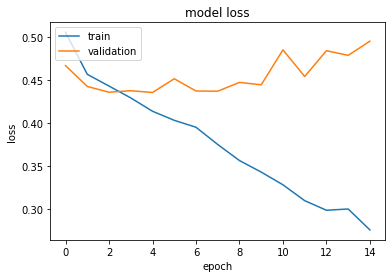

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

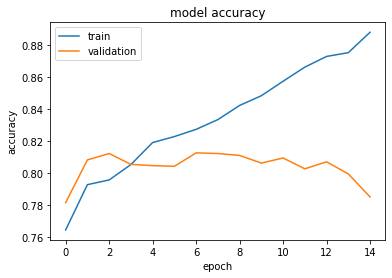

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [60]:
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test_tweet = test['text'].apply(lambda x: cleaned_tweet(x))
test_sequences = t.texts_to_sequences(test_tweet)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='pre', truncating='pre')

lst = []
for x in model.predict(test_padded):
    lst.append((lambda x: 0 if x < 0.7 else 1)(x))
sample_submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sample_submission["target"] = lst
sample_submission.to_csv("submission7.csv", index=False) 